## Group Contribution:
All three of us wrote the data acquisition and preparation. Dan organized the data cleansing code into functions. Cathy led Figure 1 and the support vector machine model. Dan led Figure 2, Table 2, and the Random Forest model. James led Figure 3, Table 1, and the K-nearest neighbor (KNN) classification method. Cathy wrote the explanation of Table 1, Figure 1, half of Figure 2, and other expository text regarding feature selection. Dan wrote the explanation of Table 2 and Figure 2. We all checked each other’s work and made revisions to code and writing.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.patches as mpatches
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier



In [ ]:

url = "https://philchodrow.github.io/PIC16A/datasets/palmer_penguins.csv"
penguins = pd.read_csv(url)
og_penguins_copy = penguins

In [ ]:
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
0,PAL0708,1,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A1,Yes,11/11/07,39.1,18.7,181.0,3750.0,MALE,NaN,NaN,Not enough blood for isotopes.
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
3,PAL0708,4,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A2,Yes,11/16/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Adult not sampled.
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,PAL0910,120,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A2,No,12/1/09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
340,PAL0910,121,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


###Remove NAs Function

In [ ]:
'''
This function will remove NAs from important columns we will be using for our exploratory data analysis
---
Input:
- df is the dataframe from which we will remove incomplete data
---
Output:
- returns df with incomplete data rows removed
'''

def remove_important_nas(df):
  #Convert '.' in Sex column to nan
  df[df['Sex'] == '.'] = float('nan')
  ## Removing rows with NAs from important columns
  # The following are the columns we've determined are important to remove rows that contain NAs
  cols = ['Species',
          'Sex',
          'Clutch Completion',
          'Date Egg',
          'Island',
          'Culmen Length (mm)',
          'Culmen Depth (mm)',
          'Body Mass (g)',
          'Delta 15 N (o/oo)',
          'Delta 13 C (o/oo)']

  for i in cols: # This will loop through each entry in the list cols
    df = df[df[i].notna()] # Logically indexes the column i and reassigns it to df

  return df

penguins = remove_important_nas(penguins)
penguins

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
1,PAL0708,2.0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,11/11/07,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454,NaN
2,PAL0708,3.0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,11/16/07,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302,NaN
4,PAL0708,5.0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,11/16/07,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426,NaN
5,PAL0708,6.0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,11/16/07,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805,NaN
6,PAL0708,7.0,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,11/15/07,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799,Nest never observed with full clutch.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,PAL0910,119.0,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N38A1,No,12/1/09,47.2,13.7,214.0,4925.0,FEMALE,7.99184,-26.20538,NaN
340,PAL0910,121.0,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/22/09,46.8,14.3,215.0,4850.0,FEMALE,8.41151,-26.13832,NaN
341,PAL0910,122.0,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A2,Yes,11/22/09,50.4,15.7,222.0,5750.0,MALE,8.30166,-26.04117,NaN
342,PAL0910,123.0,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N43A1,Yes,11/22/09,45.2,14.8,212.0,5200.0,FEMALE,8.24246,-26.11969,NaN


## Splitting the data

In [ ]:
#split training and testing data
train, test = train_test_split(penguins, test_size = 0.2)
print(len(train)


SyntaxError: ignored

## Exploratory Data Analysis

To start our exploratory data analysis, we decided to explore our qualitative variables.

First, we looked at a few traits grouped by the "Island" variable.

### Tables

Table 1

In [ ]:
eda_table = train.groupby(["Species", "Island"])[["Delta 13 C (o/oo)", "Body Mass (g)", "Culmen Length (mm)"]].mean().round(2)
eda_table

Delta 13 C (o/oo)  \
Species                                   Island                         
Adelie Penguin (Pygoscelis adeliae)       Biscoe                -25.88   
                                          Dream                 -25.79   
                                          Torgersen             -25.80   
Chinstrap penguin (Pygoscelis antarctica) Dream                 -24.55   
Gentoo penguin (Pygoscelis papua)         Biscoe                -26.17   

                                                     Body Mass (g)  \
Species                                   Island                     
Adelie Penguin (Pygoscelis adeliae)       Biscoe           3778.57   
                                          Dream            3675.00   
                                          Torgersen        3775.71   
Chinstrap penguin (Pygoscelis antarctica) Dream            3727.68   
Gentoo penguin (Pygoscelis papua)         Biscoe           5080.15   

                                                     Culmen Length (mm)  
Species                                   Island                         
Adelie Penguin (Pygoscelis adeliae)       Biscoe                  39.34  
                                          Dream                   38.36  
                                          Torgersen               39.29  
Chinstrap penguin (Pygoscelis antarctica) Dream                   48.66  
Gentoo penguin (Pygoscelis papua)         Biscoe                  47.52

Interestingly, we found that Chinstraps were only found on the Dream island and that Gentoo penguins were only found on the Biscoe island. Furthermore, all penguins found on the Torgersen island must be an Adelie penguin. This one variable allows us to eliminate at least one incorrect answer out of three.

If a penguin is found on Biscoe, it can only be an Adelie or a Gentoo penguin.
If a penguin is found on Dream, it can only be an Adelie or a Chinstrap penguin.
If a penguin is found on Torgersen, it must be an Adelie penguin.

Table 2

In [ ]:
def penguin_island_table(df):
    penguin_totals = df.groupby('Species').count()['Island'] # This will capture the totals of each penguin
    table = df.groupby(["Species", "Island"]).count()['studyName']/penguin_totals
    return table

penguin_island_table(train)

Species                                    Island   
Adelie Penguin (Pygoscelis adeliae)        Biscoe       0.264151
                                           Dream        0.405660
                                           Torgersen    0.330189
Chinstrap penguin (Pygoscelis antarctica)  Dream        1.000000
Gentoo penguin (Pygoscelis papua)          Biscoe       1.000000
dtype: float64

This table shows the proportion of each species of penguin in our training data that are found on each island.

This table tells us that, in our training data, all of the Chinstrap penguins are only found on Dream island and all of the Gentoo Penguins are only found on
Biscoe island. It seems that Adelie penguins are slightly more likely to found on Dream island, but are otherwise fairly evenly split amongst the three islands.

### Barplots (Figure 1)

Next, we decided to explore the "Sex" variable. Because members of different sexes are often physically different, we decided to create bar plots that compared sexes of the different species of penguins to qualtitative variables that were related to physical size (culmen depth, culmen length, flipper length, and body mass).

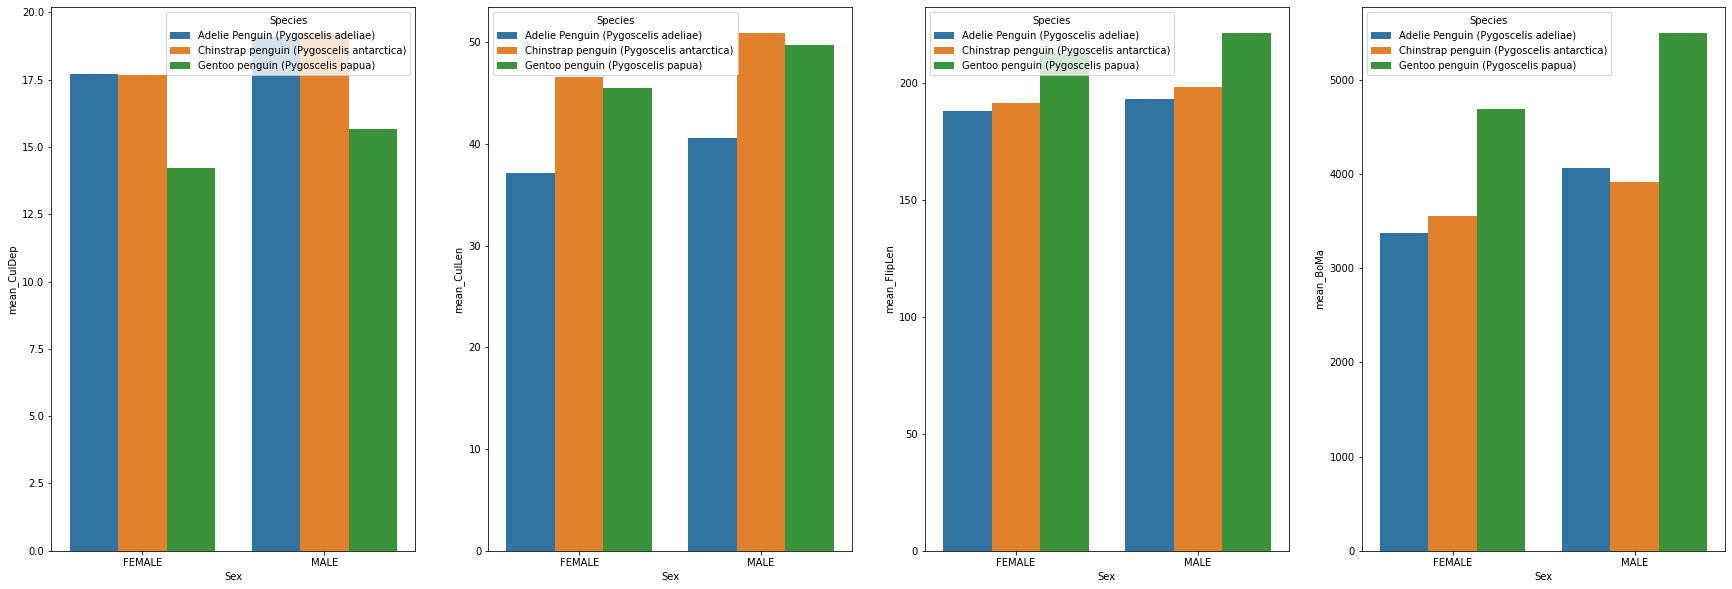

In [ ]:
#Creating subplots of bargraphs measuring different quantitative variables by species and sex


f, ax = plt.subplots(1, 4, figsize = (30, 10))
#groups data by species and sex and calculates the mean for each combination for culmen length and depth, flipper length, and body mass
bardata = train.groupby(["Species", "Sex"]).agg(mean_CulDep = ("Culmen Depth (mm)", "mean"),
                                                mean_CulLen = ("Culmen Length (mm)", "mean"),
                                                mean_FlipLen = ("Flipper Length (mm)", "mean"),
                                                mean_BoMa = ("Body Mass (g)", "mean"))
bardata = bardata.reset_index()

#plots different quantitative variables by species and sex on different axes of the figure
bplot = sns.barplot(ax = ax[0],
                    x = "Sex",
                    y = "mean_CulDep",
                    data = bardata,
                    hue = "Species"
                    )

bplot = sns.barplot(ax = ax[1],
                    x = "Sex",
                    y = "mean_CulLen",
                    data = bardata,
                    hue = "Species"
                    )

bplot = sns.barplot(ax = ax[2],
                    x = "Sex",
                    y = "mean_FlipLen",
                    data = bardata,
                    hue = "Species"
                    )

bplot = sns.barplot(ax = ax[3],
                    x = "Sex",
                    y = "mean_BoMa",
                    data = bardata,
                    hue = "Species"
                    )


We found that females were typically smaller than their male counterparts, but there was no visibly significant interaction between sex and any of the quantitative variables (e.g. Adelies had the shortest culmen length between both genders). The most noticeable exception is in body mass, in which Adelies were the smallest amongst the female penguins, but Chinstraps were the smallest amongst the male penguins.

Other interesting observations include:
- Gentoos generally had much greater body mass than the other two species.
- Gentoos generally had much shallower culmen depth than the other two species.
- Adelies generaly had much shorter culmen length than the other two species.

It could be helpful, for example, to use sex in classifying penguins by body mass (e.g. for a penguin that is 4200 grams, knowing that it is female makes it easier to classify it as a Gentoo). However, our team decided that the "Island" variable was a more reliable classifier than "Sex".

Next, we started to explore our quantitative variables.

### Quantitative Boxplots (Figure 2)

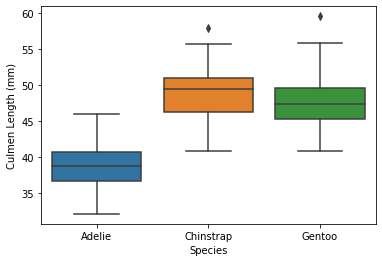

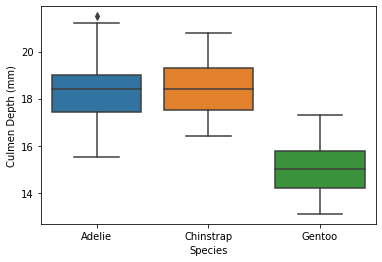

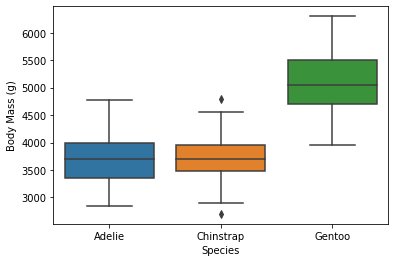

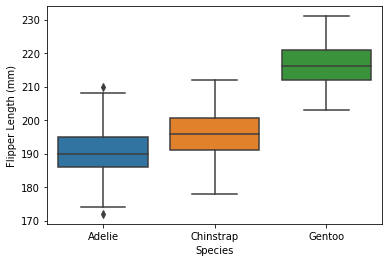

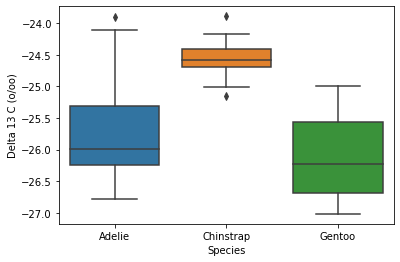

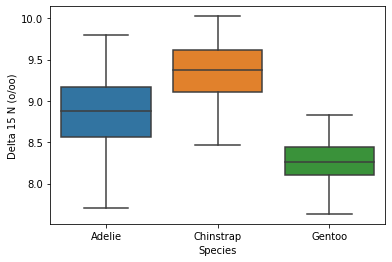

In [ ]:
'''
Creates boxplots by species of penguins
---
Input:
- df is the dataframe in which the data comes from
- cols is the column names that we want to create boxplots of
---
Output:
- No returns
'''
def penguin_boxplots(df, cols):
    for i in cols:
        fig = sns.boxplot(data = penguins, y = i, x = 'Species')
        fig.set_xticklabels(['Adelie', 'Chinstrap', 'Gentoo'])
        plt.show()


quantcols = ['Culmen Length (mm)',
             'Culmen Depth (mm)',
             'Body Mass (g)',
             'Flipper Length (mm)',
             'Delta 13 C (o/oo)',
             'Delta 15 N (o/oo)']
penguin_boxplots(train, quantcols)

**Using the boxplot from our training data, we can make the following inferences:**

Adelie and Chinstrap penguins have a similar culmen length, but Gentoo penguins generally have a much shorter culmen. It appears that if penguins culmen is less than 41 mm, it is likely a Gentoo penguin.

If a penguin has a flipper greater than 212 mm, we can be reasonably certain that it is a Chinstrap penguin. Similarly, if a penguin has a culmen depth less than 15 mm, we can also be reasonably certain it is a Chinstrap penguin.

It appears that Gentoo and Adelie penguins seem to have similar body masses and Chinstraps are generally heavier. If a penguin has a body mass greater than 4800 g, it is likely a Chinstrap

We can see that Adelie penguins, generally, have higher levels of Delta 13 C (o/oo) and higher levels of Delta 15 N (o/oo), with Chinstraps having the lowest and Gentoos having the widest range. There seems to be a lot of overlap, so this is probably not the best predictor for penguin species.

If a penguin has Delta 13 C (o/oo) levels at around -24.5, it is most likely and Adelie penguin, it could possibly be a Gentoo pengin, but it is probably not a Chinstrap. Delta 13 C(o/oo) levels are better for distinguishing between Chinstrap and Adelie penguins.



###Pairwise Scatterplots (Figure 3)

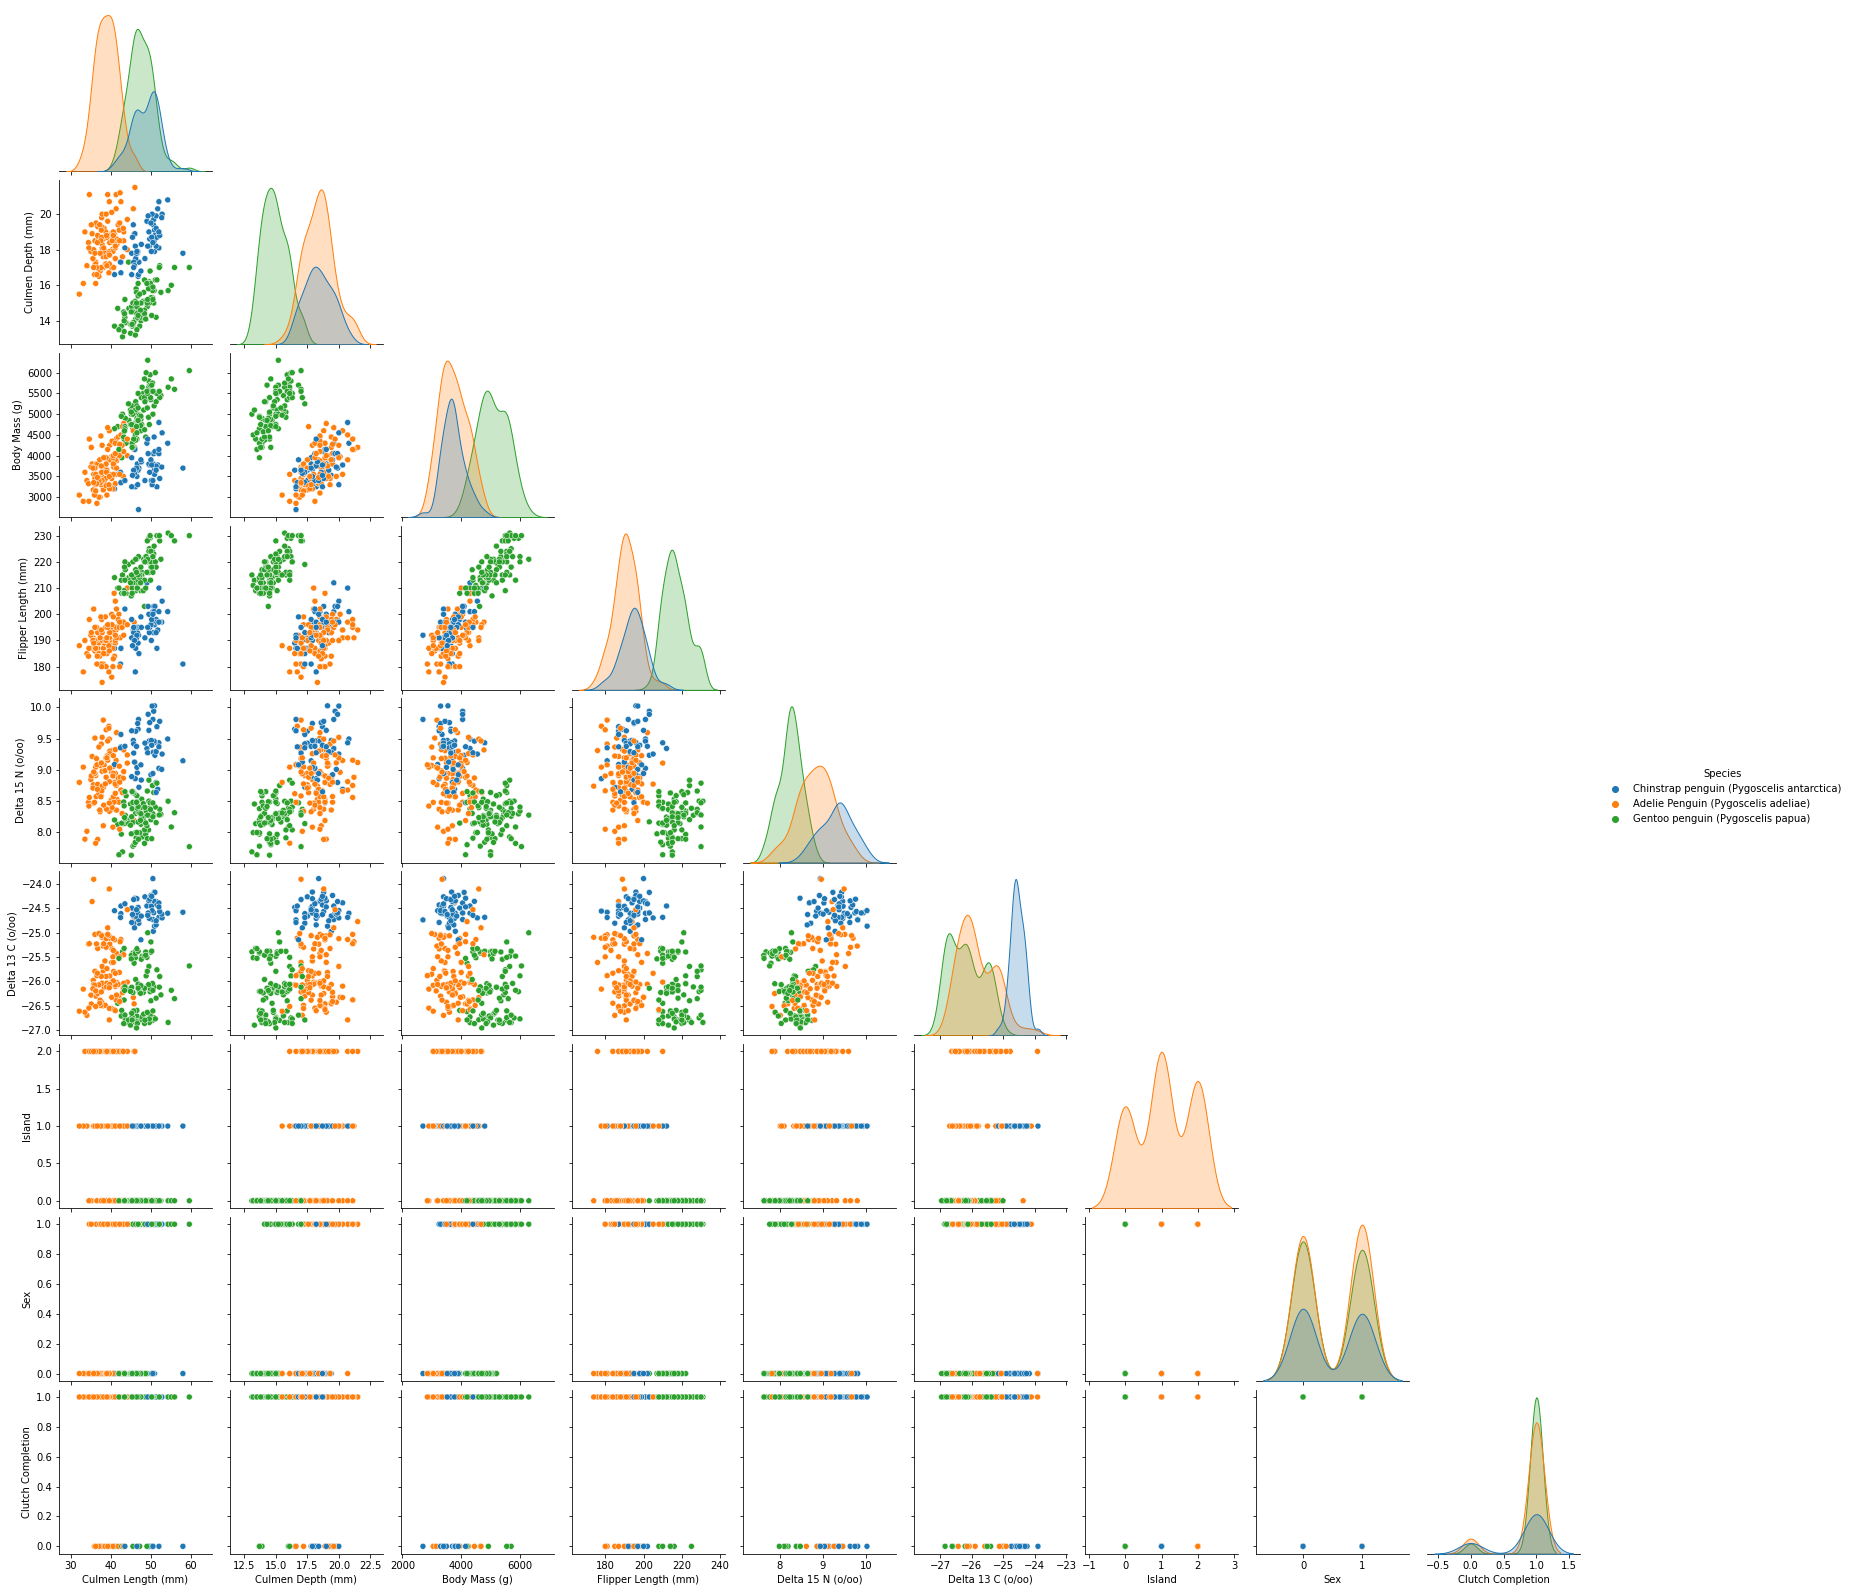

In [ ]:
# Now let us create a pairwise scatterplot to see the spread of the data for each species for each pair of columns in the dataset
# recode Sex to 0s and 1s 1 is 'Male'
train['Sex'].unique()
le = preprocessing.LabelEncoder()
train['Sex'] = le.fit_transform(train['Sex'])

# Recode 'Cluth Completion' to 0s and 1s 1 is 'yes'
le = preprocessing.LabelEncoder()
train['Clutch Completion'] = le.fit_transform(train['Clutch Completion'])

# Recode 'Island' to Numeric Briscoe = 0, Dream = 1, Torgensen = 2
le = preprocessing.LabelEncoder()
train['Island'] = le.fit_transform(train['Island'])

pp_cols = ['Culmen Length (mm)',
           'Culmen Depth (mm)',
           'Body Mass (g)',
           'Flipper Length (mm)',
           'Delta 15 N (o/oo)',
           'Delta 13 C (o/oo)',
           'Island',
           'Sex',
           'Clutch Completion']
sns.pairplot(train, hue="Species", vars=pp_cols, corner = True, dropna = True)
plt.show()

By using "Island" as our qualitative variable, our main focus in choosing our quantitative variables was in separating Adelies from Chinstraps and Adelies from Gentoos. "Island" already allows us to differentiate Chinstraps from Gentoos because Chinstraps are only found on Dream island and Gentoo are only found on Biscoe island.

Looking at the pairwise scatterplots, the combination of quantitative variables that sets Adelie penguins aside the most is Culmen Length x Culmen Depth. This is best visualized by the area charts (right-most plots of each row). The least overlap between Adelie (orange) and the other two species can be found in the first row (Culmen Length X Culmen depth)

In conclusion, we chose "Island" as our one qualitative variable and "Culmen Length" and "Culmen Depth" as our two quantitative variables.

## Data Cleansing

Next, we decided to remove the columns of our dataframe to only include the predictive variables we chose and the species of the penguins. Furthermore, we decided to rename our qualitative variables into integers that would be easier to work with.

###Data Cleansing Function

In [ ]:
'''
Used to recode penguin labels and remove unnecessary columns for our model training
---
Input:
- df is the dataframe from which we will get data
---
Output:
- df is the cleaned dataframe with recoded labels and necessary columns only (island, species, culmen length and depth)
'''
def cleanse_penguins(df):

  # Recode 'Island' to Numeric Briscoe = 0, Dream = 1, Torgensen = 2
  df['Island'] = le.fit_transform(df['Island'])

  #recode 'Species' to Numeric Adelie = 0, Chinstrap = 1, Gentoo = 3
  df['Species'] = le.fit_transform(df['Species'])

  # The following will remove all the columns we have preliminarily deemed will not be useful in model
  removecols = ['studyName',
                'Sample Number',
                'Region',
                'Individual ID',
                'Stage',
                'Comments',
                'Body Mass (g)',
                'Flipper Length (mm)',
                'Delta 15 N (o/oo)',
                'Delta 13 C (o/oo)',
                'Sex',
                'Date Egg',
                'Clutch Completion']
  df = df.loc[:, ~df.columns.isin(removecols)]

  return df


train = cleanse_penguins(train)
test = cleanse_penguins(test)

train.head()

,Species,Island,Culmen Length (mm),Culmen Depth (mm)
199,1,1,49.0,19.6
144,0,1,37.3,16.8
308,2,0,47.5,14.0
167,1,1,50.5,19.6
136,0,1,35.6,17.5


## Feature Selection

For our qualitative variable we are choosing Island. In our training set, Chinstrap are only found on Dream Island, and Gentoo penguins are only found on Biscoe. Adelie penguins are found on all islands. From what we can tell, Island is a very good way to distinguish between Chinstrap and Gentoo Penguins. With that in mind, our quantitative parameters will mostly focus on distinguishing Adelie's from Chinstraps and Gentoos.

We choose Culmen Depth and Culmen Length as our two quantitative parameters. Our main goal in selecting these parameters was to distinguish Adelies from Gentoos and Adelies from Chinstraps. We noticed in our scatter plot grid, that the plot comparing Culmen Depth to Culmen Length seemed to set Chinstraps and Gentoos apart from Adelies very clearly. Analysis was supported by our boxplots where it shows that most Adelie penguins have culmens less than 41 mm long whereas no Chinstrap or Gentoo penguins in our training data had culmen's that short. Similarly, the boxplots also show that the Culmen depth drastically varies between Gentoos and Adelies, likely making it another effective choice for a parameter in our model.

## Modeling

### X and y Split Function

In [ ]:
'''
This function will split our predictor variables and our species variable
---
Input:
- df is the dataframe from which we will split our variables
---
Output:
- X is a new dataframe with our predictor variables
- y is a new dataframe with our species variable
'''
def feature_split(df):
  X = df[['Culmen Depth (mm)', 'Culmen Length (mm)', 'Island']]
  y = df['Species']

  return X, y


X_train, y_train = feature_split(train)
X_test, y_test = feature_split(test)

###Confusion Matrix Function

In [ ]:

def confmatrix(y_pred):
    cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                    index = ['Actual ' + str(i) for i in np.unique(y_train)],
                    columns = ['Predicted ' + str(i) for i in np.unique(y_train)])
    print('Confusion Matrix:')
    display(cm)

### Countourplot Function

In [ ]:
'''
This function will create decision regions plots for our models
---
Input:
- model is the type of model we are using
- title (string) is the title of the model we want
---
Output:
- No returns
'''
def contourplot(model, title):
  #Change our data frames into arrays
  X_array = X_test.to_numpy()
  y_array = y_test.to_numpy()
  fig, ax = plt.subplots(1, 3, sharey = False, figsize = (20,7))


  # create a meshgrid of the dataset
  f1_min, f1_max = X_array[:, 0].min() - 1, X_array[:, 0].max() + 1
  f2_min, f2_max = X_array[:, 1].min() - 1, X_array[:, 1].max() + 1
  f1, f2 = np.meshgrid(np.arange(f1_min, f1_max, 0.1), np.arange(f2_min, f2_max, 0.1))

  # Create a list of islands in order of indexing
  islands_list = ['Biscoe', 'Dream', 'Torgersen']


  for i in range(3):
      # predict the class of each point in the meshgrid

      contour_array = np.c_[f1.ravel(), f2.ravel(), np.ones(f1.ravel().shape) * 1.0 * i]

      #make predictions based off each point in the contour array
      Z = model.predict(contour_array)
      Z = Z.reshape(f1.shape)

      col_dict = {0:'blue', 1:'green', 2:'red'}

      xvals = X_array[X_array[:,2]==i][:,0] # x-values for the graph
      yvals = X_array[X_array[:,2]==i][:,1] # y-values for the graph

      # We need to create the colors with a for-loop, no qualitative feature predicts all three species
      col = []
      for j in y_array[X_array[:,2]==i]:
           col.append(col_dict[j])

      #ax[i//2,i%2].scatter(X_train[X_train[:,2]==i][:,0], X_train[X_train[:,2]==i][:,1], c=y_train[X_train[:,2]==i], cmap='jet') # plot the training set samples as a scatter plot
      ax[i].scatter(xvals, yvals, c=col, cmap='jet') # plot the test set samples as a scatter plot

      ax[i].contourf(f1, f2, Z, alpha=0.1, cmap = 'jet') # plot the decision regions

      ax[i].set_xlabel('Culmen Depth (mm)')
      ax[i].set_ylabel('Culmen Length (mm)')
      ax[i].set_title('Island:' + islands_list[i])

  legend0 = mpatches.Patch(color = 'red', label = 'Gentoo', alpha = 0.2)
  legend1 = mpatches.Patch(color = 'green', label = 'Chinstrap', alpha = 0.2)
  legend2 = mpatches.Patch(color = 'blue', label = 'Adelie', alpha = 0.2)
  fig.legend(handles = [legend0, legend1, legend2],loc = (0.9,0.92), fontsize = 'medium',framealpha = 1)

  plt.suptitle(str(title), y=1)
  plt.tight_layout()
  plt.show()

## Random Forest Classifier Model

A Brief Overview

In a broad sense this model essentially tests multiple decision trees on subsections of the data. Each tree casts a “vote” for the classification. The overall average of the forest is likely more accurate, on average, than a single decision tree alone.

### K-fold Cross-Validation

Before running the model, we use K-fold Cross-Validation to choose the best values for `n_estimators` (or the optimal number of trees in our forest) and `max_depth` (or the optimal maximum depth of trees in our forest)

*Note: We were slightly limited by our computing power for this specific attempt at cross validation. Because each model is an average of multiple decision trees, testing a larger range of hyperparaeters than what we did would take a very long time to run.*

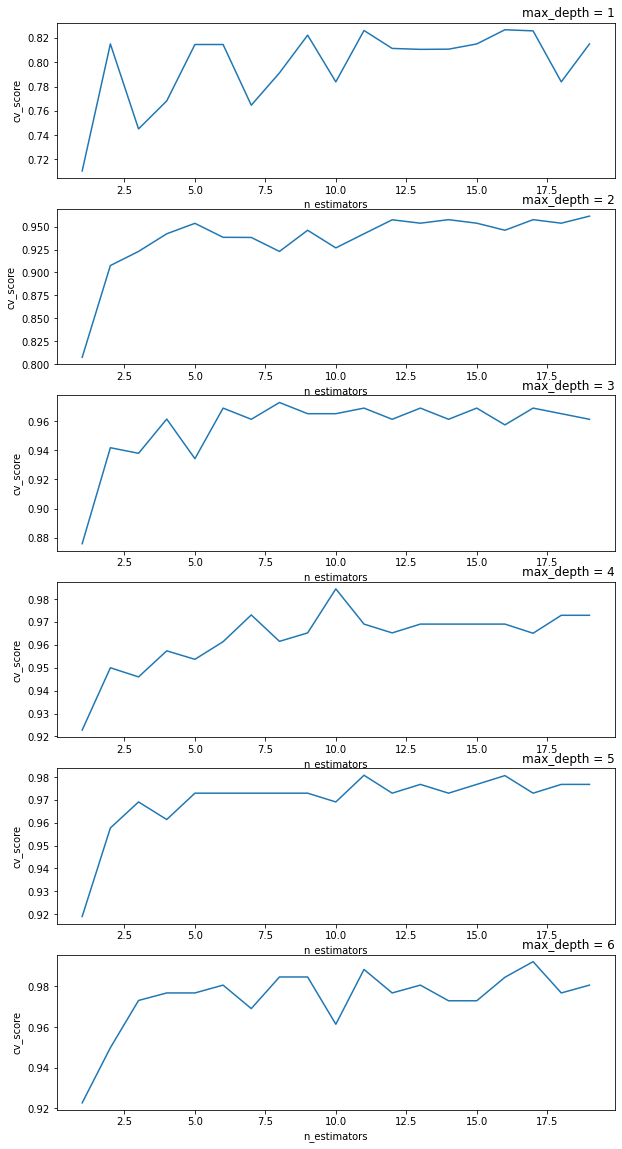

Best max_depth is 6
Best n is 17
Best score is 0.992153846153846


In [ ]:
best_score = 0
scores = []
for d in range(1, 7):
  for n in range(1,20):
    clf = RandomForestClassifier(n_estimators = n, max_depth=d)
    cv_score = cross_val_score(clf, X_train, y_train, cv = 10).mean()
    scores.append(cv_score)
    if cv_score > best_score:
      best_depth = d
      best_n = n
      best_score = cv_score

fig, ax = plt.subplots(6, 1, figsize=(10, 20))
for i in range(6):
    ax[i].plot(range(1, 20), scores[i*19:(i+1)*19])
    ax[i].set_title('max_depth = ' + str(i+1), loc = "right")
    ax[i].set_xlabel('n_estimators')
    ax[i].set_ylabel('cv_score')
plt.show()

print("Best max_depth is " + str(best_depth))
print("Best n is " + str(best_n))
print("Best score is " + str(best_score))

Fitting and Confusion Matrix

In [ ]:
clf = RandomForestClassifier(max_depth=best_depth, n_estimators = best_n)
print(cross_val_score(clf, X_train, y_train, cv = 10).mean())


y_pred = clf.fit(X_train, y_train).predict(X_test)
confmatrix(y_pred)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

0.9883076923076924
Confusion Matrix:


,Predicted 0,Predicted 1,Predicted 2
Actual 0,33,0,0
Actual 1,0,10,1
Actual 2,0,0,21


Accuracy: 0.98


Decision Regions Plot

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


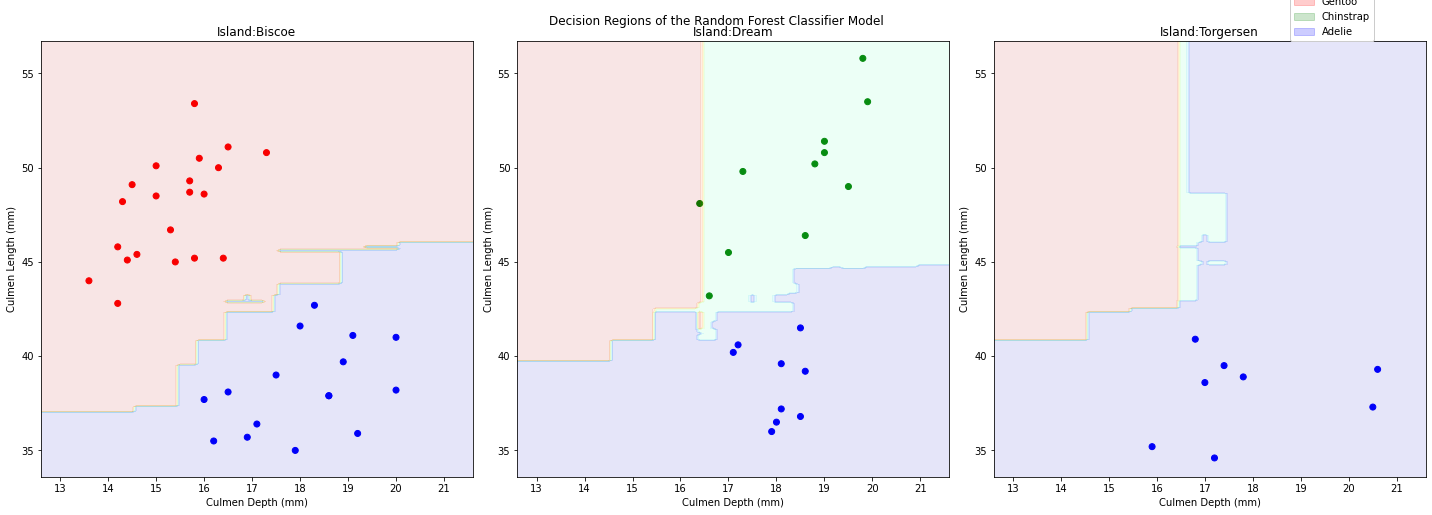

In [ ]:
contourplot(clf, "Decision Regions of the Random Forest Classifier Model")

This model was very accurate with testing data, however there were a few big issues. Firstly, although we used cross validation to try to avoid this, the model showed clear signs of overfitting.

The boundaries on the decision plot are quite jagged, and while it performed well on the test data, areas near the boundaries are unnecessarily complicated. We used cross validation to find the optimal maximum depth of each decision tree and number of trees in the forest. If we were to attempt to build this model again (with more processing power) we would suggest a broader range for cross validation testing to find maximum depth and number of trees and also attempting cross validation on the number of subdivisions of the data.

Furthermore, the model also seemed to predict a possibility of Gentoo Penguins on the Islands of Dream and Torgensen. All of the training data suggests that there were no Gentoos on Dream and Torgensen, which showed that model did not consider Island as a strong predictor. This is probably due to the fact that the individual decision trees are assigning more importance to testing the quantitative data (Culmen Length and Culmen Depth) than the qualitative data, (Island).

##Support Vector Machine Model




A Brief Overview

The support vector machine is a model that takes in data points and outputs decision boundaries (hyperplanes) that best categorizes the data.

The model attempts to maximize distance between data points of the different classes. This gives more space on each side of the hyperplane to be attributed to the different classes.

K-fold Cross-Validation

Before we run our SVM model, we want to determine our best C hyperparameter.

"C" controls the cost of misclassification of the training data, where small C makes the cost lower and big C makes the cost higher. Basically, a smaller C allows for more misclassified data, allowing for a smoother decision boundary, while a larger C will classify training data points more accurately but may lead to overfitting if overdone.


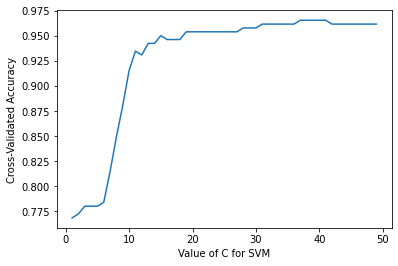

Best C is 3.7
Best score is 0.9653846153846153


In [ ]:
best_score = 0
scores = []
for c in range(1, 50):
    SVM = svm.SVC(C = c * 0.1)
    cv_score = cross_val_score(SVM, X_train, y_train, cv = 10).mean()
    scores.append(cv_score)
    if cv_score > best_score:
        best_C = round(c * 0.1, 2)
        best_score = cv_score

# plot to see clearly
plt.plot(range(1, 50), scores)
plt.xlabel('Value of C for SVM')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("Best C is " + str(best_C))
print("Best score is " + str(best_score))

Now that we have found our best C, let's fit it to our training data and test it on our testing data!

Fitting

In [ ]:

SVM = svm.SVC(C = best_C)
SVM.fit(X_train, y_train)

y_pred = SVM.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))


Accuracy: 0.97


Wow, the accuracy of our model on our testing data is quite high! Let's look at exactly how the model did on the penguin species classification by using a confusion matrix.

Confusion Matrix

In [ ]:
confmatrix(y_pred)

Confusion Matrix:


,Predicted 0,Predicted 1,Predicted 2
Actual 0,33,0,0
Actual 1,1,9,1
Actual 2,0,0,21


The model did a pretty good job, but made a few mistakes when predicting the Chinstrap penguins! Let's take a look at a visual representation of the classification.

Decision Regions Plots

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


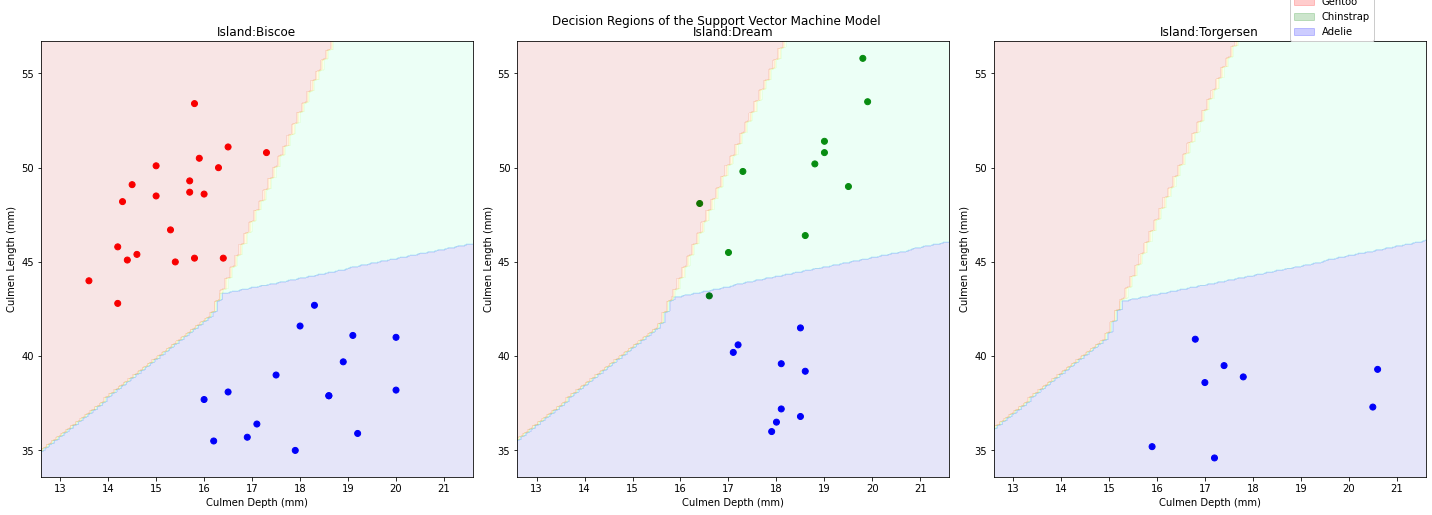

In [ ]:
contourplot(SVM, "Decision Regions of the Support Vector Machine Model")

The SVM model did a pretty good job sorting the penguin species out by the interactions between culmen length and depth. If you look at the decision regions, the model accurately saw patterns of:
- The Gentoo penguins having smaller culmen depth with longer culmen length
- The Chinstrap penguins having greater culmen depth and length
- The Adelie penguins having shorter culmen length.

However, because the model uses straight hyperplanes to delineate the penguins, some outliers are not classified properly.

Furthermore, one glaring error of this model is that it seems to not have taken the qualitative variable into account the way we expected—that is, the model does not realize that only Adelies and Gentoos are on Biscoe, Adelies and Chinstraps are on Dream, and Adelies are on Torgerson.

##K-Nearest Neighbors (KNN) Classification Method

A Brief Overview:

The K-Nearest Neighbors model works to classify a data point by seeing what the classification of it’s K closest neighbors are.

K-fold Cross-Validation

We performed K-fold Cross Validation to choose an optimal number of neighbors that the model will use to compare the data point to. After running these tests, we determeined that k was most optimal at 3.

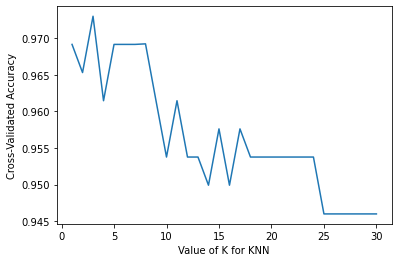

Best # of neighbors is 3
Best score is 0.9730015082956258


In [ ]:
# choose k between 1 to 31
k_range = range(1, 31)
k_scores = []
best_score = 0

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    cv_score = cross_val_score(knn, X_train, y_train, cv = 5, scoring = 'accuracy').mean()
    k_scores.append(cv_score.mean())
    if cv_score > best_score:
        best_neighbors = i
        best_score = cv_score

# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

print("Best # of neighbors is " + str(best_neighbors))
print("Best score is " + str(best_score))

We can see here that the highest cross-validated accuracy scores are between 0 and 4, with equivalent cv_scores at 1 and 3. Below, we use n_neighbors = 3 to get the highest possible KNN accuracy.

In [ ]:
# Apply a KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluate the KNN classifier accuracy
print("KNN Accuracy:", accuracy_score(y_test, y_pred))

KNN Accuracy: 1.0


Confusion Matrix

In [ ]:
species_list = ['Adelie', 'Chinstrap', 'Gentoo']
cm = pd.DataFrame(confusion_matrix(y_test, y_pred),
                  index = ['Actual ' + str(i) for i in species_list],
                  columns = ['Predicted ' + str(i) for i in species_list])
print('Confusion Matrix:')
print(cm)

Confusion Matrix:
                  Predicted Adelie  Predicted Chinstrap  Predicted Gentoo
Actual Adelie                   33                    0                 0
Actual Chinstrap                 0                   11                 0
Actual Gentoo                    0                    0                21


Decision Regions Plots

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


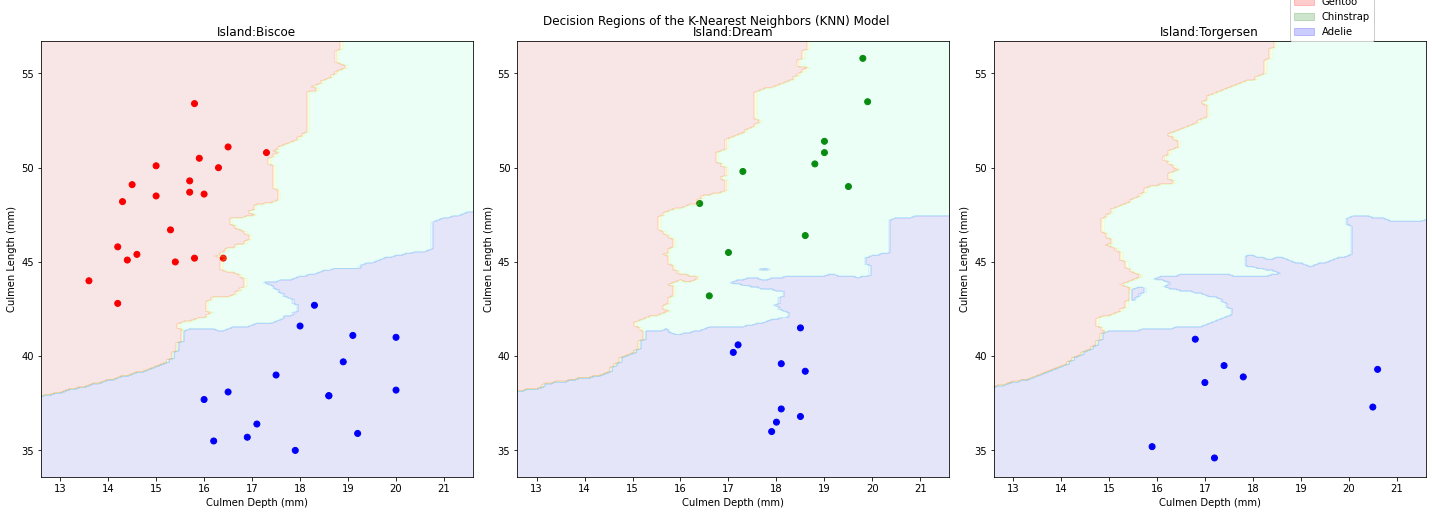

In [ ]:
contourplot(knn, "Decision Regions of the K-Nearest Neighbors (KNN) Model")

This model performed very well with our data, however, we had a similar problem to the Random Forest Classifier with very jagged boundaries. This is likely due to the general shape of the training data. It is simple but very effect method of classification, however, it can result in very complicated boundaries. If we had more data, it would probably give us smoother boundaries. Another issue is that this style of model is heavily based on quantitative variables. This model doesn’t seem to have a large emphasis on Island location, which suggests that is was not very necessary in making the model significantly more accurate.

##Discussion


For our qualitative variable we are choosing Island. In our training set, Chinstrap are only found on Dream Island, and Gentoo penguins are only found on Biscoe. Adelie penguins are found on all islands. From what we can tell, Island is a very good way to distinguish between Chinstrap and Gentoo Penguins. With that in mind, our quantitative parameters will mostly focus on distinguishing Adelie's from Chinstraps and Gentoos.

We choose Culmen Depth and Culmen Length as our two quantitative parameters. Our main goal in selecting these parameters was to distinguish Adelies from Gentoos and Adelies from Chinstraps. We noticed in our scatter plot grid, that the plot comparing Culmen Depth to Culmen Length seemed to set Chinstraps and Gentoos apart from Adelies very clearly. Analysis was supported by our boxplots where it shows that most Adelie penguins have culmens less than 41 mm long whereas no Chinstrap or Gentoo penguins in our training data had culmen's that short. Similarly, the boxplots also show that the Culmen depth drastically varies between Gentoos and Adelies, likely making it another effective choice for a parameter in our model.

**In conclusion, we would recommend the features “Island”, “Culmen Length”, and “Culmen Depth”.**

We chose to test our variables using (1) the Random Forest Classifier model, (2) the Support Vector Machine model, and (3) the K-Nearest Neighbors Classification model. **We found that the KNN model performed the best on our test data, classifying 100% of the penguin species correctly! The RF and SVM models predicted the penguin species with 98% and 97% accuracy, respectively.**
Although our KNN model made predictions of our test model with the highest accuracy, **we would actually recommend the SVM model** for a few reasons. First, its boundaries were the simplest, yet still highly accurate. It had only a 3% accuracy difference from our KNN model, which performed best on our test data this round. Second, the KNN model works best with small datasets as it is computationally heavier than the SVM. The KNN model relies on advanced distance computations on observable data similarities to classify the data and requires a large memory. In our dystopian future, there are too many penguins to classify! Although our RF model used our qualitative variable most effectively, the model was too overfitted so we did not choose to recommend this model.

The most glaring limitation of our SVM model was that it did not classify the penguin species by island like we thought it would. Each island should have a maximum of two species possible, yet there are classification regions for all three penguins on all three islands. **One way our SVM model could be improved is if our dataset was big enough for SVM to learn the patterns behind the islands.** It’s possible that with a dataset this small, the machine learning algorithm may not have assumed that, for example, there were only Adelies possible on Torgenson, and instead assumed that it just so happened that our dataset only contained Adelies on Torgenson. **A second way our SVM model could be improved is if we chose a variable other than island.** Because the decision regions of each island were almost identical, it seems that this model was not very good at taking qualitative information into account. This model may have worked better with three quantitative variables rather than qualitative variables.
